In [67]:
import os
os.chdir("..")
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from concurrent.futures import ProcessPoolExecutor
import cv2
from PIL import Image

with open("classes.txt") as f:
    classes = f.read().splitlines()

In [2]:
results_dir = "/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results/"
results_paths = [os.path.join(results_dir, path) for path in os.listdir(results_dir) if path.endswith("mse")]

distance_matrix_files = {path: [fpath for fpath in os.listdir(path) if fpath.endswith("distance_matrix.csv")] for path in results_paths}
distance_matrix_files

{'/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results/real_vs_synthetic_mse': ['PRPH2_distance_matrix.csv',
  'CACNA1F_distance_matrix.csv',
  'CERKL_distance_matrix.csv',
  'RPGR_distance_matrix.csv',
  'BEST1_distance_matrix.csv',
  'KCNV2_distance_matrix.csv',
  'EYS_distance_matrix.csv',
  'OPA1_distance_matrix.csv',
  'BBS1_distance_matrix.csv',
  'RDH12_distance_matrix.csv',
  'RS1_distance_matrix.csv',
  'RP2_distance_matrix.csv',
  'ABCA4_distance_matrix.csv',
  'CDH23_distance_matrix.csv',
  'MTTL1_distance_matrix.csv',
  'RHO_distance_matrix.csv',
  'PROML1_distance_matrix.csv',
  'GUCY2D_distance_matrix.csv',
  'CHM_distance_matrix.csv',
  'CNGA3_distance_matrix.csv',
  'RPE65_distance_matrix.csv',
  'TIMP3_distance_matrix.csv',
  'CYP4V2_distance_matrix.csv',
  'CRB1_distance_matrix.csv',
  'PRPF31_distance_matrix.csv',
  'MYO7A_distance_matrix.csv',
  'CRX_distance_matrix.csv',
  'USH2A_distance_matrix.csv',
  'NR2E3_distance_matrix.csv',
  'RP1_distance

## Similarity Scores

In [3]:
metrics = pd.DataFrame(columns=["type", "gene", "gen_image_path", "real_image_path", "MSE"])
for type_ in distance_matrix_files:
    for path in distance_matrix_files[type_]:
        df = pd.read_csv(os.path.join(type_, path), index_col="Unnamed: 0")
        df = df[["gen_image_path", "real_image_path", "MSE"]]
        df["gene"] = [path.split("_")[0]]*len(df)
        df["type"] = os.path.basename(type_)
        metrics = metrics.append(df)

metrics

/home/zchayav/anaconda3/envs/syntheye/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,type,gene,gen_image_path,real_image_path,MSE
0,real_vs_synthetic_mse,PRPH2,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.110511
1,real_vs_synthetic_mse,PRPH2,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.113924
2,real_vs_synthetic_mse,PRPH2,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.116761
3,real_vs_synthetic_mse,PRPH2,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.119849
4,real_vs_synthetic_mse,PRPH2,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.121785
...,...,...,...,...,...
2699,real_vs_real_mse,PRPF8,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.000004
2700,real_vs_real_mse,PRPF8,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.000051
2701,real_vs_real_mse,PRPF8,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.000063
2702,real_vs_real_mse,PRPF8,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.000077


In [39]:
real_vs_real = metrics[metrics.type == "real_vs_real_mse"]

differences = pd.DataFrame(columns=["gene", "real_vs_real", "real_vs_synthetic", "synthetic_vs_synthetic"])

for gene, gene_df in metrics.groupby("gene"):
    metric_values = [gene]
    for type_, type_df in gene_df.groupby("type"):
        mse_df = type_df.sort_values('MSE', ascending=True)
        metric_values.append(mse_df["MSE"].min())
    df1 = pd.DataFrame([metric_values], columns=["gene", "real_vs_real", "real_vs_synthetic", "synthetic_vs_synthetic"])
    differences = pd.concat([differences, df1])
differences

,gene,real_vs_real,real_vs_synthetic,synthetic_vs_synthetic
0,ABCA4,-0.000597,0.114528,-0.000683
0,BBS1,-0.000393,0.134512,-0.000380
0,BEST1,-0.000551,0.150100,-0.000524
0,CACNA1F,-0.000473,0.194976,-0.000521
0,CDH23,-0.000450,0.177971,-0.000288
0,CERKL,-0.001331,0.095305,-0.000473
0,CHM,-0.000593,0.142815,-0.000744
0,CNGA3,-0.000531,0.213122,-0.000516
0,CNGB3,-0.000698,0.130062,-0.000505
0,CRB1,-0.000465,0.133813,-0.000660


In [87]:
top_100 = []
metrics_real_vs_synthetic = metrics[metrics.type == "real_vs_synthetic_mse"]
for gene, gene_df in metrics_real_vs_synthetic.groupby("gene"):
    top_100.append(gene_df.sort_values('MSE', ascending=True).iloc[0:100])
top100 = pd.concat(top_100)
top100

,type,gene,gen_image_path,real_image_path,MSE
0,real_vs_synthetic_mse,ABCA4,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.114528
1,real_vs_synthetic_mse,ABCA4,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.121233
2,real_vs_synthetic_mse,ABCA4,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.124027
3,real_vs_synthetic_mse,ABCA4,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.124666
4,real_vs_synthetic_mse,ABCA4,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.125411
...,...,...,...,...,...
95,real_vs_synthetic_mse,USH2A,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.154256
96,real_vs_synthetic_mse,USH2A,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.154475
97,real_vs_synthetic_mse,USH2A,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.154850
98,real_vs_synthetic_mse,USH2A,/home/zchayav/projects/stylegan2-ada-pytorch/s...,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,0.154923


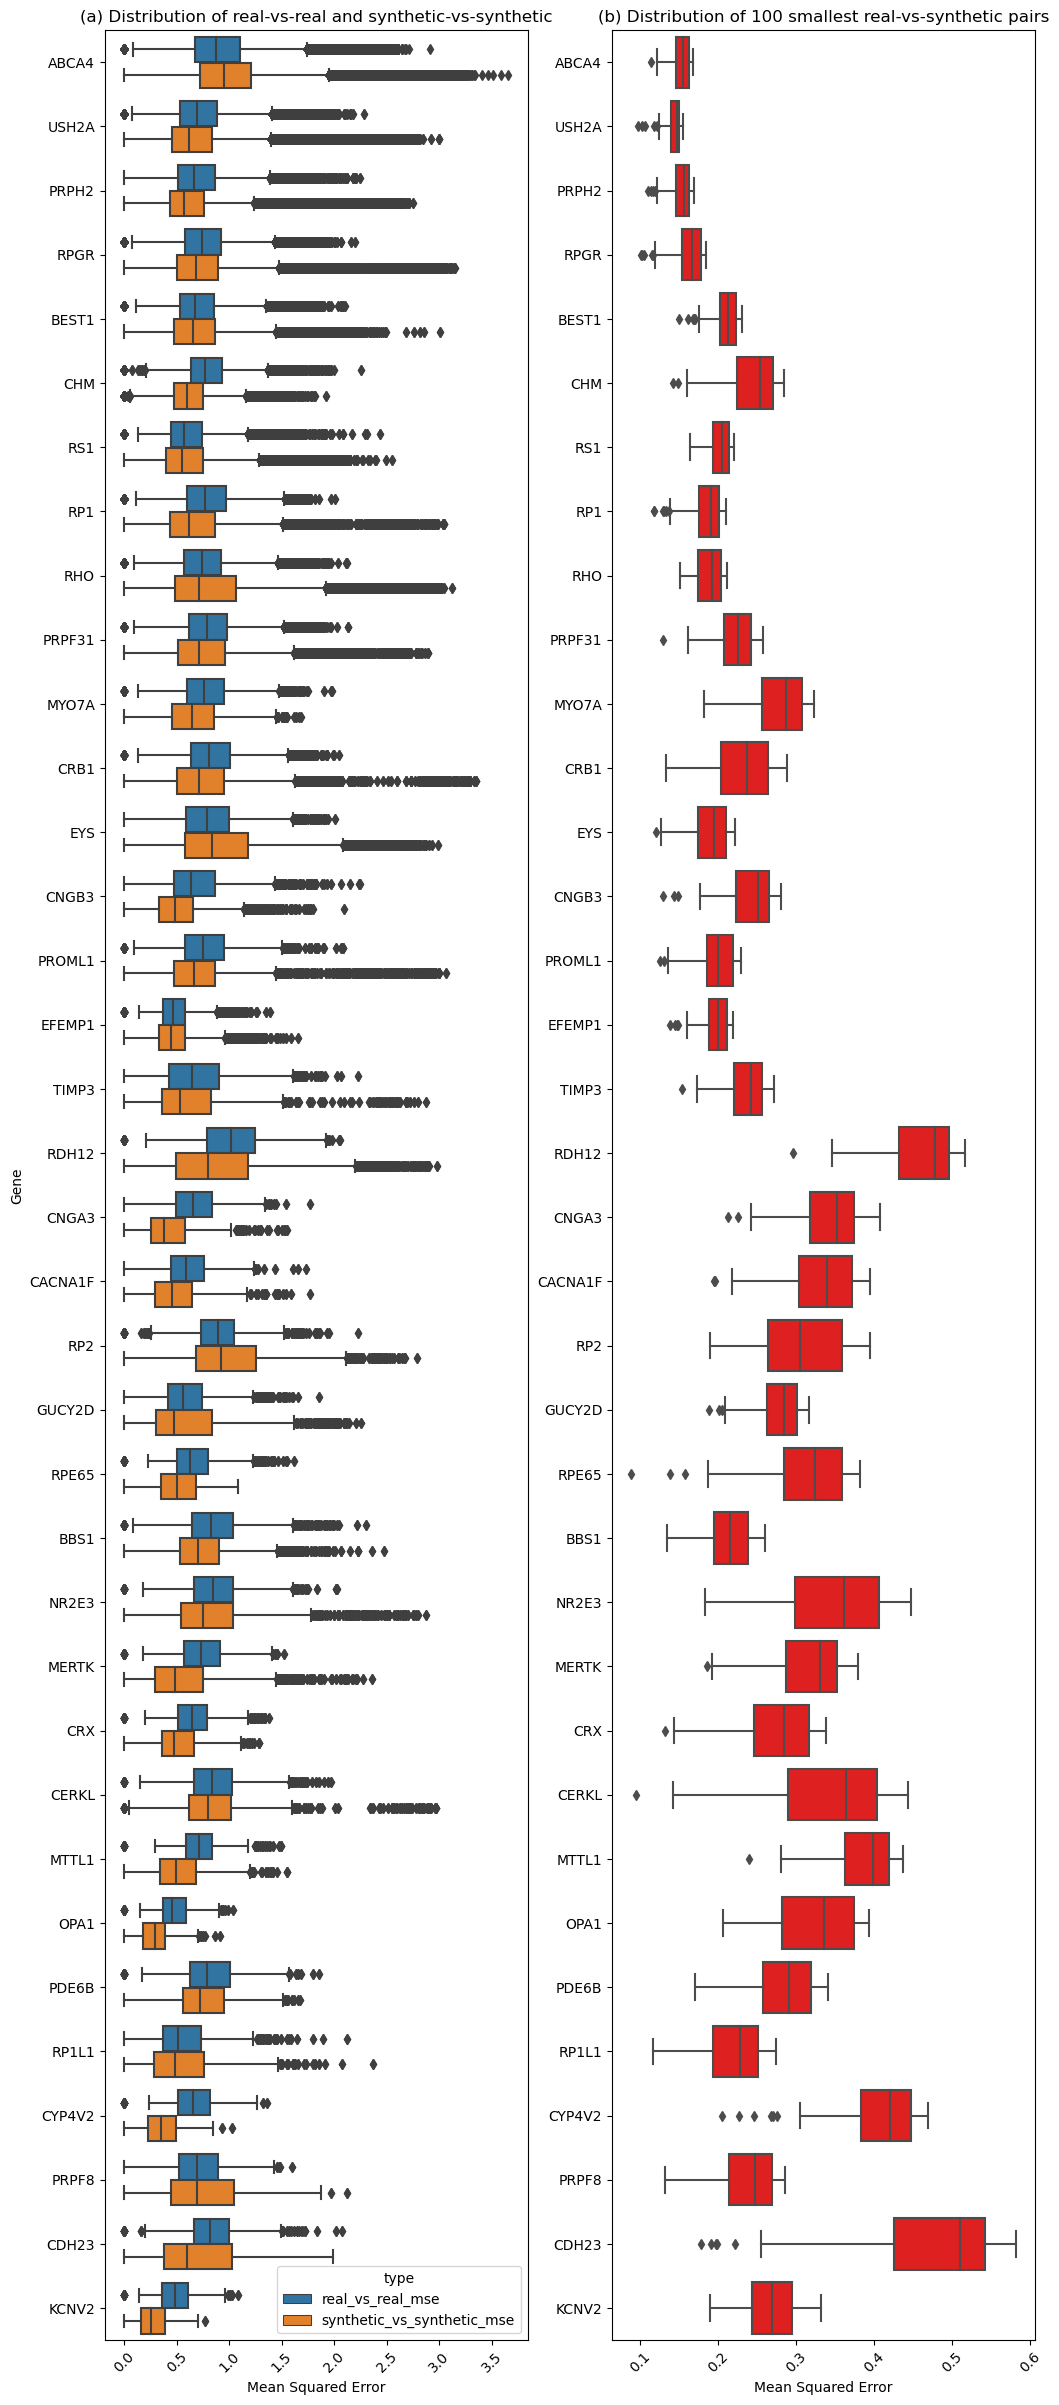

In [98]:
plt.figure(figsize=(12, 30))

plt.subplot(1,2,1)
sns.boxplot(data=metrics[metrics.type.isin(["real_vs_real_mse", "synthetic_vs_synthetic_mse"])], y="gene", x="MSE", order=classes, hue="type", hue_order=["real_vs_real_mse", "synthetic_vs_synthetic_mse"])
plt.ylabel("Gene")
plt.xlabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.title("(a) Distribution of real-vs-real and synthetic-vs-synthetic")

plt.subplot(1, 2, 2)
sns.boxplot(data=top100, y="gene", x="MSE", order=classes, color="red")
plt.ylabel("")
plt.xlabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.title("(b) Distribution of 100 smallest real-vs-synthetic pairs")
# plt.suptitle("")
plt.show()
plt.close()

In [99]:
metrics.to_csv("/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results/MSE_summary.csv", index=False)

## Quality Evaluation

In [38]:
results_path = "/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results/brisque_scores"
brisque_scores_path = os.listdir(results_path)

brisque_scores_synthetic = pd.DataFrame(columns=["gene", "Synthetic image path", "Quality Score"])
for path in brisque_scores_path:
    print(path)
    df = pd.read_csv(os.path.join(results_path, path), index_col="Unnamed: 0")
    df["gene"] = path.split("_")[0]
    brisque_scores_synthetic = brisque_scores_synthetic.append(df)
brisque_scores_synthetic["image_type"] = ["synthetic"]*len(brisque_scores_synthetic)
brisque_scores_synthetic.rename(columns={"gene":"gene", "Synthetic image path": "file.path", "Quality Score": "brisq.score"}, inplace=True)
brisque_scores_synthetic.reset_index(inplace=True, drop=True)

CNGB3_quality_scores.csv
OPA1_quality_scores.csv
RP1_quality_scores.csv
BEST1_quality_scores.csv
CNGA3_quality_scores.csv
CRX_quality_scores.csv
CERKL_quality_scores.csv
RPE65_quality_scores.csv
RP2_quality_scores.csv
CYP4V2_quality_scores.csv
USH2A_quality_scores.csv
TIMP3_quality_scores.csv
CHM_quality_scores.csv
PRPF8_quality_scores.csv
RHO_quality_scores.csv
PROML1_quality_scores.csv
BBS1_quality_scores.csv
GUCY2D_quality_scores.csv
EYS_quality_scores.csv
PRPF31_quality_scores.csv
NR2E3_quality_scores.csv
RS1_quality_scores.csv
MERTK_quality_scores.csv
MTTL1_quality_scores.csv
CACNA1F_quality_scores.csv
RP1L1_quality_scores.csv
CRB1_quality_scores.csv
RPGR_quality_scores.csv
CDH23_quality_scores.csv
EFEMP1_quality_scores.csv
MYO7A_quality_scores.csv
PRPH2_quality_scores.csv
ABCA4_quality_scores.csv
RDH12_quality_scores.csv
KCNV2_quality_scores.csv
PDE6B_quality_scores.csv


In [39]:
brisque_scores_synthetic

,gene,file.path,brisq.score,image_type
0,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,120.816457,synthetic
1,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.944276,synthetic
2,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,112.941172,synthetic
3,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.772265,synthetic
4,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,122.251748,synthetic
...,...,...,...,...
10582,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,85.063787,synthetic
10583,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,84.458651,synthetic
10584,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,103.425903,synthetic
10585,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,114.118802,synthetic


In [4]:
real_results_path = "/home/zchayav/projects/syntheye/datasets/eye2gene_new_filepaths/all_baf_valid_50deg_filtered_train_0_edited.csv"
real_df = pd.read_csv(real_results_path)
real_df = real_df[real_df.fold != -1]
real_df = real_df[["gene", "file.path", "brisq.score"]]
real_df["image_type"] = ["real"]*len(real_df)
real_df.reset_index(drop=True, inplace=True)

In [7]:
from brisque import BRISQUE
from tqdm import tqdm
import numpy as np
from PIL import Image
brisq = BRISQUE()

# modify brisq values
new_brisq = np.zeros(len(real_df))
for i, row in tqdm(real_df.iterrows()):
    img = Image.open(row["file.path"])
    img = img.resize((512, 512))
    new_brisq[i] = brisq.get_score(np.array(img))
    
real_df["brisq.score"] = np.array(new_brisq)

10587it [12:18, 14.34it/s]


In [9]:
real_df.to_csv("/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results/brisque_scores/real_imgs_brisque.csv", index=False)

## Plot distribution of scores

In [49]:
combined_df = pd.concat([brisque_scores_synthetic, real_df], axis=0)
combined_df

,gene,file.path,brisq.score,image_type
0,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,120.816457,synthetic
1,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.944276,synthetic
2,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,112.941172,synthetic
3,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.772265,synthetic
4,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,122.251748,synthetic
...,...,...,...,...
10582,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,89.424263,real
10583,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,97.026676,real
10584,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,75.174052,real
10585,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,92.499929,real


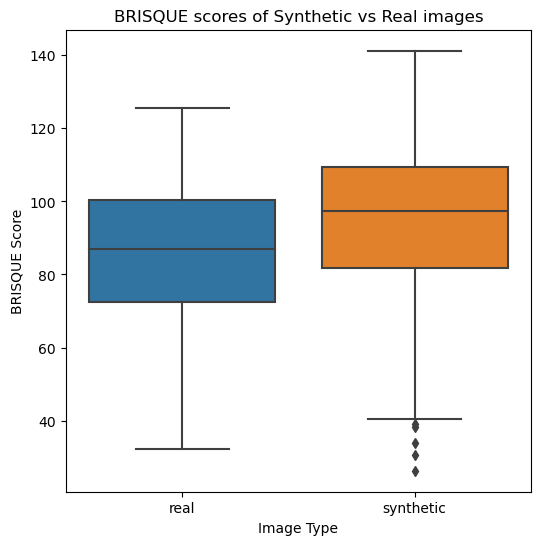

In [60]:
with open("../classes.txt") as f:
    classes = f.read().splitlines()

plt.figure(figsize=(6, 6))
sns.boxplot(data=combined_df, y="brisq.score", x="image_type", order=["real", "synthetic"])
# plt.xticks(rotation=45)
plt.xlabel("Image Type")
plt.ylabel("BRISQUE Score")
plt.title("BRISQUE scores of Synthetic vs Real images")
plt.show()

## Retraining Results

In [119]:
simple_df

,index,Dataset Type,Training Regime,Accuracy
0,0,R,1,0.3275
1,0,R,2,0.2076
2,0,1800S,1,0.1585
3,0,1800S,2,0.1795
4,0,3600S,1,0.3323
5,0,3600S,2,0.3240
6,0,10800S,1,0.2923
7,0,10800S,2,0.2773
8,0,R1800S,1,0.1935
9,0,R1800S,2,0.2084


In [127]:
inception_accuracies = [0.5751, 0.5199, 0.4108, 0.3861, 0.4627, 0.4219, 0.5011, 0.4829, 0.5737, 0.5211, 0.5767, 0.5205, 0.5868, 0.5108]
densenet_accuracies = [0.6058, 0.4221, 0.4514, 0.5242, 0.5983, 0.5925, 0.5795, 0.5187, 0.4209, 0.4302, 0.4799, 0.5098, 0.5039, 0.5045]
simple_accuracies = [0.3275, 0.2773, 0.2076, 0.1935, 0.1585, 0.2084, 0.1795, 0.1466, 0.3323, 0.2759, 0.3240, 0.2860, 0.2923, 0.2296]
dataset_types = ["R", "1800S", "3600S", "10800S", "R1800S", "R3600S", "RB"]
regimes = [1, 2]
columns=["Dataset Type", "Training Regime", "Accuracy"]
inception_df = pd.DataFrame(columns=columns)
simple_df = pd.DataFrame(columns=columns)
densenet_df = pd.DataFrame(columns=columns)

i = 0
for d in dataset_types:
    for r in regimes:
        df1 = pd.DataFrame([[d, r, simple_accuracies[i]]], columns=columns)
        simple_df = pd.concat([simple_df, df1])
        i += 1
simple_df = simple_df.reset_index()

plt.figure(figsize=(6, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=simple_df, y="Dataset Type", x="Accuracy", hue="Training Regime", order=["1800S", "3600S", "10800S", "R", "R1800S", "R3600S", "RB"])
plt.legend(title="Regime", loc='upper right')
plt.title("(a) Multiclass Perceptron Model")
plt.xlim(0, 1)
plt.axvline(x=0.3275, color="red", linestyle="--", label="Model accuracy on real data only - Regime 1")
plt.axvline(x=0.2773, color="green", linestyle="--", label="Model accuracy on real data only - Regime 2")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

# i = 0
# for d in dataset_types:
#     for r in regimes:
#         df1 = pd.DataFrame([[d, r, densenet_accuracies[i]]], columns=columns)
#         densenet_df = pd.concat([densenet_df, df1])
#         i += 1
# densenet_df = densenet_df.reset_index()

# plt.subplot(3, 1, 2)
# sns.barplot(data=densenet_df, y="Dataset Type", x="Accuracy", hue="Training Regime")
# plt.legend(title="Regime", loc='upper right')
# plt.title("DenseNet-169 Model")

i = 0
for d in dataset_types:
    for r in regimes:
        df1 = pd.DataFrame([[d, r, inception_accuracies[i]]], columns=columns)
        inception_df = pd.concat([inception_df, df1])
        i += 1
inception_df = inception_df.reset_index()

plt.subplot(2, 1, 2)
sns.barplot(data=inception_df, y="Dataset Type", x="Accuracy", hue="Training Regime", order=["1800S", "3600S", "10800S", "R", "R1800S", "R3600S", "RB"],)
# plt.legend(title="Regime", loc='upper right')
plt.title("(a) InceptionV3 model")
plt.axvline(x=0.5751, color="red", linestyle="--", label="Model accuracy on real data only - Regime 1")
plt.axvline(x=0.5199, color="green", linestyle="--", label="Model accuracy on real data only - Regime 2")
plt.xlim(0, 1)

plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', labels=["Model accuracy 1", "Model Accuracy 2", "Regime 1", "Regime 2"])
plt.show()

AttributeError: 'Rectangle' object has no property 'legend'